In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
# import plotly as px

In [4]:
url = 'https://archive.ics.uci.edu/static/public/53/data.csv'
column_names = ['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка', 'Класс']
df = pd.read_csv(url, header=None, names=column_names)
df.columns = column_names
df.drop (index=df.index [0], axis= 0 , inplace= True )
df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']]=df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']].astype(float)
df

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Класс
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


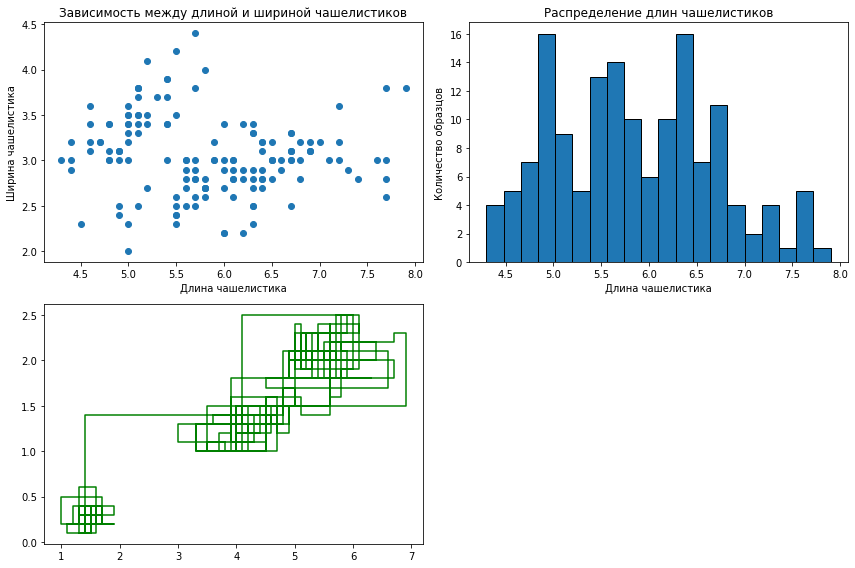

In [17]:



plt.figure(figsize=(12, 8))

# Суб-график 1: Scatter plot - зависимость между длиной и шириной чашелистиков
plt.subplot(2, 2, 1)
plt.scatter(df['Длина чашелистика'], df['Ширина чашелистика'])
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.title('Зависимость между длиной и шириной чашелистиков')

# Суб-график 2: Гистограмма - распределение длин чашелистиков
plt.subplot(2, 2, 2)
plt.hist(df['Длина чашелистика'], bins=20, edgecolor='black')
plt.xlabel('Длина чашелистика')
plt.ylabel('Количество образцов')
plt.title('Распределение длин чашелистиков')

# Суб-график 3: Линейный график - изменение длины чашелистиков в зависимости от класса ирисов
plt.subplot(2, 2, 3)
# class_colors = ['red', 'green', 'blue']
# for i in range(1, 4):
#     subset = df[df['Класс'] == i]
#     x_values = np.arange(len(subset))
#     y_values = subset['Длина чашелистика'].to_numpy()
#     plt.plot(x_values, y_values, color=class_colors[i-1], label='Класс {}'.format(i))
# plt.xlabel('Образцы')
# plt.ylabel('Длина чашелистика')
# plt.title('Изменение длины чашелистиков в зависимости от класса ирисов')
# plt.legend()
x_values = df['Длина лепестка'].to_numpy()
y_values = df['Ширина лепестка'].to_numpy()
plt.step(x_values, y_values, color = 'green')





# Установка расстояния между суб-графиками
plt.tight_layout()

# Отображение графиков
plt.show()


In [ ]:
# 2) На основе Вашего датасета построить три разных вида графиков используя 
# pandas.DataFrame.plot / Series.plot (мануал) 
# Среди графиков должен присутствовать один boxplot 
# (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). 
# Графики должны быть построены как через методы DataFrame, так и через методы Series. 
# То есть оба варианта нужно продемонстрировать.

# диаграмма (boxplot) с использованием DataFrame.plot
df.boxplot(by='Класс', column=['Длина чашелистика'], grid = False)
plt.xlabel('Класс')
plt.ylabel('Длина чашелистика')
plt.title('Boxplot: Взаимосвязь между классом ирисов и длиной чашелистиков')
plt.show()

# Линейный график с использованием DataFrame.plot
plt.plot(df['Длина чашелистика'])
plt.xlabel('Образцы')
plt.ylabel('Длина чашелистика')
plt.title('Линейный график: Изменение длины чашелистиков в образцах')
plt.show()

# Гистограмма с использованием Series.plot
df['Длина чашелистика'].plot.hist(bins=20)
plt.xlabel('Длина чашелистика')
plt.ylabel('Количество образцов')
plt.title('Распределение длины чашелистиков')
plt.show()

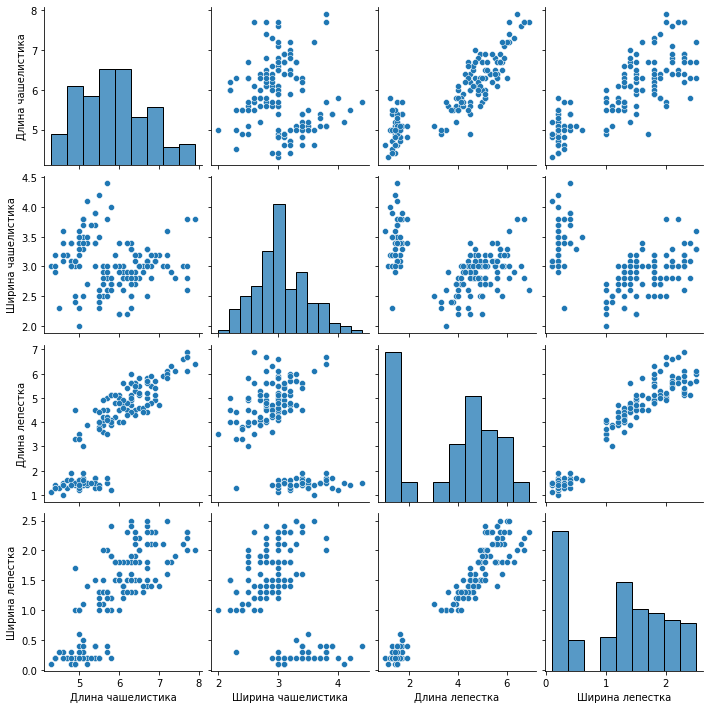

In [7]:
# 3) Seaborn
# 3.1) Построить .pairplot с помощью seaborn на каком-либо наборе данных, 
# проанализировав взаимосвязь набора числовых переменных

df.dropna(inplace=True)
numeric_vars = ['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка','Ширина лепестка']
sns.pairplot(df[numeric_vars])
plt.show()


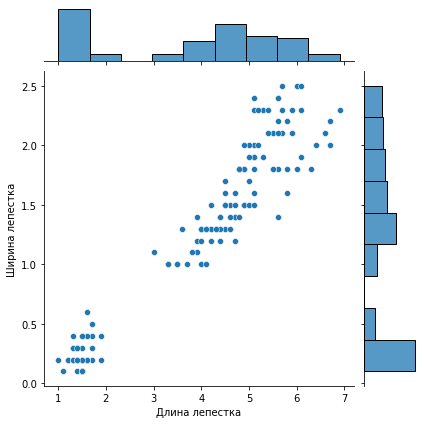

In [8]:
# 3.2) Построить .jointplot

df.dropna(inplace=True)
x_var = 'Длина лепестка'
y_var = 'Ширина лепестка'
sns.jointplot(data=df, x=x_var, y=y_var, kind='scatter')
plt.show()

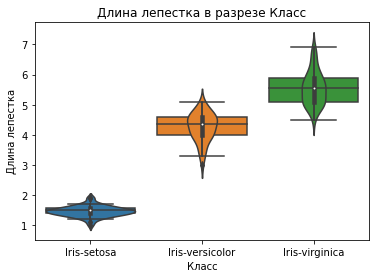

In [9]:
# 3.3) Построить .boxplot или .violinplot на каком-либо наборе данных, 
# проанализировав какой-то числовой показатель в разрезе категориального

df.dropna(inplace=True)
numeric_var = 'Длина лепестка'
categorical_var = 'Класс'

sns.boxplot(x=categorical_var, y=numeric_var, data=df)
sns.violinplot(x=categorical_var, y=numeric_var, data=df)
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)
plt.title(f'{numeric_var} в разрезе {categorical_var}')
plt.show()

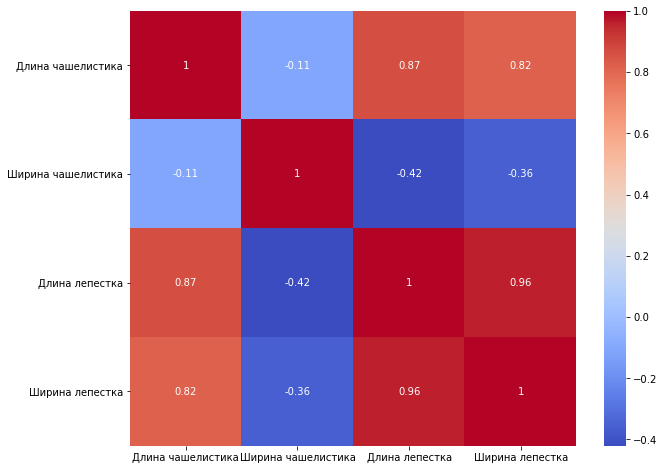

In [10]:
#3.4) Построить график heatmap попарной корреляции всех числовых признаков 
# (категориальные признаки убираете из графика)

numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# 4) Построить любой график (связанный с вашими данными) с помощью plotly

fig = px.box(df, x="Класс", y="Ширина лепестка", title="Box Plot of Class by Petal width")
fig.show()

NameError: name 'px' is not defined